# <center> STUDI KOMPARASI PERFORMA KLASIFIKASI KANKER PAYUDARA </center>

<img src='img/cancer_benign_malignant.png'>

Pada kesempatan ini kita akan menguji performa dari tiga model classifier, yaitu kNN, Naive Bayes dan Decision Tree C45 dalam mendiagnosis kanker payudara berdasarkan citra digital hasil biopsi. Kanker payudara (dan banyak kanker lainnya) dapat diketahui dari jaringan tumor yang terbentuk pada tubuh. Tumor biasanya dikategorikan menjadi dua, yaitu benign (tumor jinak) dan malignant (tumor ganas). Tumor benign atau tumor jinak, menandakan sel dalam jaringan tersebut masih normal dan tidak membahayakan. Namun, jika tumor dikategorikan sebagai malignant maka tumor tersebut dapat membentuk sel kanker yang berbahaya.

Uji performa semacam ini sudah lumrah dalam Data Mining. Untuk dapat membentuk model yang paling akurat dalam memprediksikan suatu kelas, kita harus melakukan eksperiman dan perbandingan dengan berbagai macam metode. Hasil analisis uji performa seperti ini umumnya layak dijadikan sebagai karya ilmiah seperti tugas akhir, tesis, disertasi, konferensi internasional dan nasional serta jurnal ilmiah. Tentu saja kompleksitasnya berbeda-beda.

In [1]:
# setting tampilan visualisasi confusion matrix
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

## Import Data

Dalam notebook ini kita akan menggunakan data kanker payudara yang telah disediakan oleh scikit-learn.

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np

In [3]:
dataset = load_breast_cancer()

Modul load_breast_cancer() memuat berbagai macam informasi. Dari fitur, label, nama label, deskripsi dataset. Modul ini kita tampung dalam variabel *dataset*.

In [4]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Pada deskripsi di atas, kita dapat mengetahui dataset terdiri dari 30 fitur dengan dua kelas, yaitu malignant dan benign. Semua fitur merupakan atribut kontinyu ratio. Jumlah instance dengan kelas malignant adalah 212 dan benign adalah 357. Terdapat imbalanced data, dimana kelas benign lebih banyak daripada kelas malignant. Ini adalah hal yang sering terjadi pada permasalahan nyata, dimana ada satu kelas yang jauh lebih sedikit dengan kelas lainnya. 

Misalkan saja kita ingin melakukan klasifikasi fraudulunce pada kartu kredit dilihat dari transaksinya. Tentu saja transaksi yang fraud akan jauh lebih kecil jumlahnya dibandingkan dengan transaksi yang legal.

In [5]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

Dalam modul tersebut, terdapat dua buah nama label yaitu malignant dan benign. Namun, label yang nanti akan masuk tidak dapat berupa string. Nama label akan digantikan menjadi angka dengan tipe integer.

In [6]:
np.unique(dataset.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

Kita bisa lihat pada hasil code di atas, malignant direpresentasikan dengan bilangan '0' dan benign direpresentasikan dengan bilangan '1'.

In [7]:
dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Untuk melihat fitur dari dataset tersebut, kita dapat menggunakan atribut .data (istilah atribut di sini mengacu pada konsep Object Oriented Programming pada Python, bukan istilah atribut pada data mining).

In [8]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Kemudian untuk melihat label dari dataset kita dapat menggunakan atribut .target

In [9]:
x = dataset.data
y = dataset.target 

Kita ambil label dari dataset tersebut untuk ditampung pada variabel *y* dan fitur dari dataset tersebut untuk ditampung pada variabel *x*.

---------

## Preprocessing Data

Pada tahapan ini kita akan mengolah dataset terlebih dahulu agar dapat diolah dengan baik oleh metode klasifikasi yang akan kita gunakan.

In [10]:
# import modul untuk split dataset
from sklearn.model_selection import train_test_split

Dataset akan kita bagi menjadi 2 bagian, yaitu training dan testing. Kita akan menggunakan modul train_test_split() yang telah disediakan oleh sklearn.

Hasil dari penggunaan modul train_test_split() ini adalah 4 array, yaitu fitur training, fitur testing, label training dan label testing. Keempat array tersebut kita tampung dalam variabel *x_train, x_test, y_train, y_test*. Pemisahan dataset menjadi training dan testing yang baik akan mempertahankan jumlah antar kelas yang sama pada training dan testing. Supaya distribusi data pada training dan testing sama (atau mirip), kita gunakan parameter *stratify* pada modul train_test_split().

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

Kita cek distribusi pada training set

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([148, 250], dtype=int64))

In [13]:
print(250/148)

1.6891891891891893


Cek distribusi data pada testing set

In [14]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 64, 107], dtype=int64))

In [15]:
print(107/64)

1.671875


Tahapan kedua dalam preprocessing adalah scalling atau normalisasi fitur. Hal ini bertujuan untuk meniadakan ketergantungan unit pengukuran pada fitur yang ada. Dalam scikit-learn telah ada modul normalisasi menggunakan rumus z-score, modul tesebut adalah StandardScaler()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

$${x}'=\frac{x-\mu }{\sigma }$$

Dalam normalisasi z-score, kita harus mencari rata-rata (mean) dan standar deviasi (std) dari dataset untuk dapat melakukan normalisasi. Tentu saja mean dan std yang dapat kita hitung berasal dari training set. Tidak logis jika kita menghitung mean dan std dari testing set, karena pada konsepnya kita belum mengetahui seperti apa data yang akan kita prediksi. Jika kita melakukan normalisasi pada data testing menggunakan mean dan std dari training set, ini dapat menimbulkan performa yang baik pada saat eksperimen namun performa yang buruk pada real-world application. Hal ini disebut *data/information leakage*.

Untuk itu, modul StandarScaler() tersebut hanya akan kita fit() pada training set. Dengan kata lain, fit() ini akan mencari mean dan std dari training set.

In [18]:
scaler.fit(x_train)

StandardScaler()

mean dan std yang telah kita dapatkan dari training set kemudian kita gunakan untuk melakukan normalisasi di training dan testing set.

In [19]:
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

---------

## Klasifikasi

Pada proses klasifikasi kita akan bandingkan 3 metode yang telah kita pelajari, yaitu kNN, Naive Bayes dan Decision Tree C45. Di setiap metode tersebut, kita tidak akan banyak melakukan parameter tuning, kita hanya akan gunakan parameter default yang telah ditetapkan oleh scikit-learn.

### a. kNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
kNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [22]:
model_kNN = kNN.fit(x_train_norm, y_train)

### b. Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
naiveBayes = GaussianNB()

In [25]:
model_naiveBayes = naiveBayes.fit(x_train_norm, y_train)

### c. Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
treeC45 = DecisionTreeClassifier(criterion='gini')

In [28]:
model_treeC45 = treeC45.fit(x_train_norm, y_train)

## Analisis Performa

In [29]:
from sklearn.metrics import plot_confusion_matrix as plot_cm

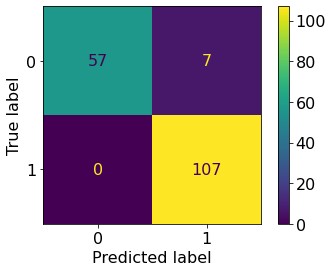

In [30]:
plot_cm(model_kNN, x_test_norm, y_test)

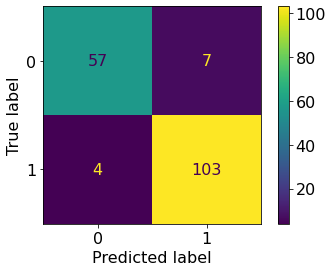

In [31]:
plot_cm(model_naiveBayes, x_test_norm, y_test)

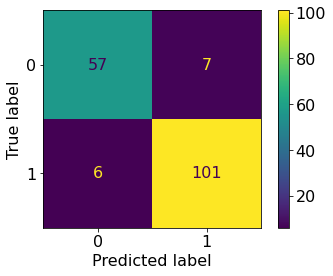

In [32]:
plot_cm(model_treeC45, x_test_norm, y_test)

## Kesimpulan